<a href="https://colab.research.google.com/github/BetMelgarejo/Proyecto-I---Metodos/blob/main/PROYECTO_M%C3%89TODOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1 de Métodos**



---



(a) (5 puntos) Cargar y/o descargar datos de alguna fuente de información financiera. Una parte importante es la descarga de informacion y donde encontrarla, en clase vimos como conectarse a Yahoo Finance.

Si quieres alcanzar los 20 puntos de esta pregunta descarga la informacion de Yahoo Finance de manera automatica del activo financiero de tu eleccion desde 2010 ( ́ındice accionario, precio de una acción, precio de una materia prima, (cripto)moneda, etc), en el reporte describe el activo que de tu elección. Si decidiste no hacerlo de manera automática y solo cargar la información de .csv o .xlsx asegúrate que envíes el .csv o .xlsx a los profesores para que puedan correr tu código (solo alcanzaras 1 punto de 5 posibles).

In [ ]:
## Importamos las librerías a emplear para el código:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

##Definimos una función para descargar el precio de cierre de uno o más activos
def obtener_datos(stocks):
    inicio = "2010-01-01"
    fin = datetime.datetime.today().strftime('%Y-%m-%d')
    df = yf.download(stocks, start=inicio, end=fin)['Close']
    return df

##El activo elegido para este proyecto fue Google. Descargamos la información:
df = obtener_datos(['GOOGL'])
df

[*********************100%***********************]  1 of 1 completed


Ticker,GOOGL
Date,
2010-01-04,15.609804
2010-01-05,15.541063
2010-01-06,15.149294
2010-01-07,14.796626
2010-01-08,14.993881
...,...
2025-03-24,167.679993
2025-03-25,170.559998
2025-03-26,165.059998


(b) (5 puntos) Calcula los rendimientos diarios del activo financiero, reporta dentro del Streamlit la media, sesgo y exceso de curtosis. Puedes usar Excel u otras herramientas para comprobar tus resultados pero tu código debe de ser capaz de presentar estos resultados.

In [ ]:
from scipy.stats import kurtosis, skew, shapiro

##Definimos una función para calcular los rendimientos logarítmicos del activo.
def calcular_rendimientos(df):
    return df.pct_change().dropna()

##Obtenemos los rendimientos, la media, el sesgo y la kurtosis del activo
df_rendimientos = calcular_rendimientos(df)

kurtosis = kurtosis(df_rendimientos)
sesgo = skew(df_rendimientos)
media = df_rendimientos.mean()

print(kurtosis)
print(sesgo)
print(media)

[8.00483773]
[0.32791263]
Ticker
GOOGL    0.000747
dtype: float64


[7.28138802]
[0.08197273]
Ticker
GOOGL    0.000598
dtype: float64


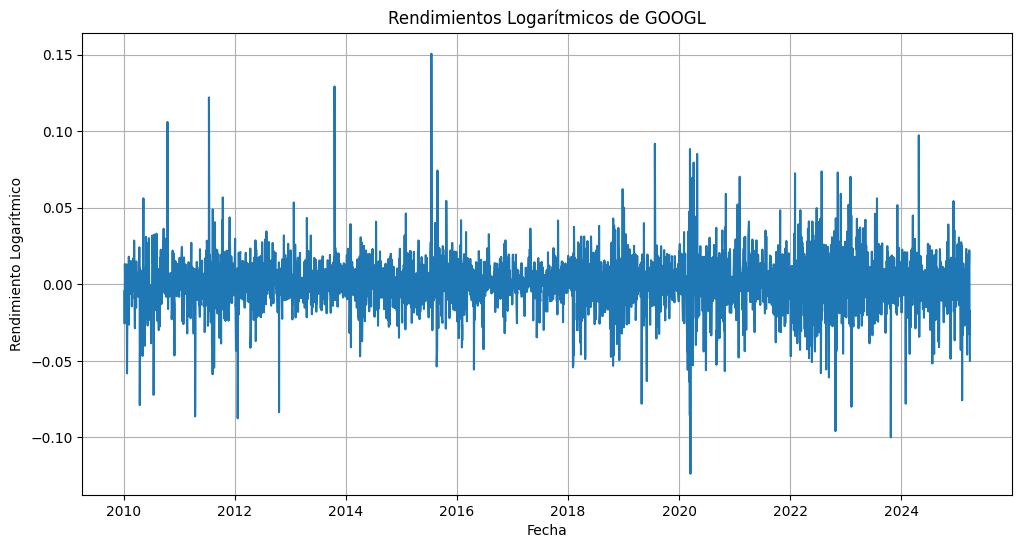

In [ ]:
from scipy.stats import kurtosis, skew, shapiro
##Definimos una función para calcular los log-rendimientos del activo.
def rendimientos_logaritmicos(df):
    razon_precios = df / df.shift(1)
    rendimientos_log = np.log(razon_precios)
    return rendimientos_log.dropna()
##Obtenemos los rendimientos, la media, el sesgo y la kurtosis del activo
df_logrendimientos = (rendimientos_logaritmicos(df))
kurtosis = kurtosis(df_logrendimientos)
sesgo = skew(df_logrendimientos)
media = df_logrendimientos.mean()

print(kurtosis)
print(sesgo)
print(media)
##Gráfica de los log-rendimientos
plt.figure(figsize=(12, 6))
plt.plot(df_logrendimientos.index, df_logrendimientos['GOOGL'])
plt.title('Rendimientos Logarítmicos de GOOGL')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Logarítmico')
plt.grid(True)
plt.show()

(c) (10 puntos) Calcula el VaR y ES para la serie completa de datos a los siguientes intervalos de confianza:

α = 0,95, 0,975, y 0,99 bajo una aproximación paramétrica asumiendo una distribución normal y t-student, además bajo una aproximación histórica y Monte Carlo. Muestra tus resultados en una tabla en el reporte.

In [ ]:
## VaR con el método histórico
hVar_95 = df_rendimientos.quantile(0.05)
hVar_975 = df_rendimientos.quantile(0.025)
hVar_99 = df_rendimientos.quantile(0.01)
print("VaR con el método histórico: ")
print(hVar_95)
print(hVar_975)
print(hVar_99)

## VaR con el método Monte Carlo: Distribución normal
n_simulaciones = 100000
df_rendimientos_montecarlo_normal = np.random.normal(df_rendimientos.mean(), df_rendimientos.std(), (n_simulaciones, len(df_rendimientos.columns)))
MC_Var_95 = np.percentile(df_rendimientos_montecarlo_normal.sum(axis=1), 5)
MC_Var_975 = np.percentile(df_rendimientos_montecarlo_normal.sum(axis=1), 2.5)
MC_Var_99 = np.percentile(df_rendimientos_montecarlo_normal.sum(axis=1), 0.5)

print("VaR con el método Monte Carlo: ")
print(MC_Var_95*100)
print(MC_Var_975*100)
print(MC_Var_99*100)

# **REVISAR: AYUDA ME DA VALORES MUY FEOS**
## VaR con el método Monte Carlo: Distribución T-Student
n_simulaciones = 100000
df_rendimientos_montecarlo_t = np.random.standard_t(df_rendimientos.shape[1], (n_simulaciones, len(df_rendimientos.columns)))
MC_Var_95_t = np.percentile(df_rendimientos_montecarlo_t.sum(axis=1), 5)
MC_Var_975_t = np.percentile(df_rendimientos_montecarlo_t.sum(axis=1), 2.5)
MC_Var_99_t = np.percentile(df_rendimientos_montecarlo_t.sum(axis=1), 0.5)

print("VaR con el método Monte Carlo: ")
print(MC_Var_95_t*100)
print(MC_Var_975_t*100)
print(MC_Var_99_t*100)

VaR con el método histórico: 
Ticker
GOOGL   -0.025363
Name: 0.05, dtype: float64
Ticker
GOOGL   -0.034818
Name: 0.025, dtype: float64
Ticker
GOOGL   -0.047333
Name: 0.01, dtype: float64
VaR con el método Monte Carlo: 
-2.7562292968400834
-3.3076247393057026
-4.403271173605422
VaR con el método Monte Carlo: 
-631.5829553725381
-1245.2689669363147
-6113.229821971633


In [ ]:
from scipy.stats import norm, t
## Paramétrico
def var_es_parametrico(rendimientos, alpha, dist='normal'):
    if dist == 'normal':
        var = norm.ppf(1 - alpha, loc=rendimientos.mean(), scale=rendimientos.std())
        es = -rendimientos[rendimientos <= var].mean()
    elif dist == 't-student':
        df = len(rendimientos) - 1  # Grados de libertad
        var = t.ppf(1 - alpha, df, loc=rendimientos.mean(), scale=rendimientos.std())
        es = -rendimientos[rendimientos <= var].mean()
    else:
        raise ValueError("La distribución debe ser 'normal' o 't-student'")
    return var, es
##Función para Método histórico
def var_es_historico(rendimientos, alpha):
    var = rendimientos.quantile(1 - alpha)
    es = -rendimientos[rendimientos <= var].mean()
    return var, es
#Función para Montecarlo
def var_es_montecarlo(rendimientos, alpha, n_sim=10000):
    media = rendimientos.mean()
    std = rendimientos.std()
    sim_rendimientos = np.random.normal(media, std, n_sim)  # Asumiendo distribución normal (para simular solamente)
    var = np.percentile(sim_rendimientos, 100 * (1 - alpha))
    es = -sim_rendimientos[sim_rendimientos <= var].mean()
    return var, es
##Nuestro vector de alphas:
alphas = [0.95, 0.975, 0.99]
resultados = []

# Utilizamos 'df_logrendimientos' (el DataFrame de rendimientos logarítmicos)
# Ya que 'GOOGL' es el nombre de la columna con los rendimientos logaritmicos:

rendimientos = df_logrendimientos['GOOGL']
### Hacemos que corra sobre el vector de alphas
for alpha in alphas:
    var_normal, es_normal = var_es_parametrico(rendimientos, alpha, dist='normal')
    var_t, es_t = var_es_parametrico(rendimientos, alpha, dist='t-student')
    var_hist, es_hist = var_es_historico(rendimientos, alpha)
    var_mc, es_mc = var_es_montecarlo(rendimientos, alpha)

    resultados.append([alpha, var_normal, es_normal, var_t, es_t, var_hist, es_hist, var_mc, es_mc])

# DataFrame del VaR Obtenido y el ES
columnas = ['Alpha', 'VaR Normal', 'ES Normal', 'VaR t-Student', 'ES t-Student',
           'VaR Histórico', 'ES Histórico', 'VaR Monte Carlo', 'ES Monte Carlo']
df_resultados = pd.DataFrame(resultados, columns=columnas)
##resultados
print(df_resultados)

   Alpha  VaR Normal  ES Normal  VaR t-Student  ES t-Student  VaR Histórico  \
0  0.950   -0.027769   0.043133      -0.027776      0.043133      -0.025691   
1  0.975   -0.033204   0.048961      -0.033214      0.048961      -0.035438   
2  0.990   -0.039522   0.054629      -0.039539      0.054629      -0.048490   

   ES Histórico  VaR Monte Carlo  ES Monte Carlo  
0      0.040477        -0.027876        0.035133  
1      0.051262        -0.033918        0.040545  
2      0.065156        -0.040283        0.045170  


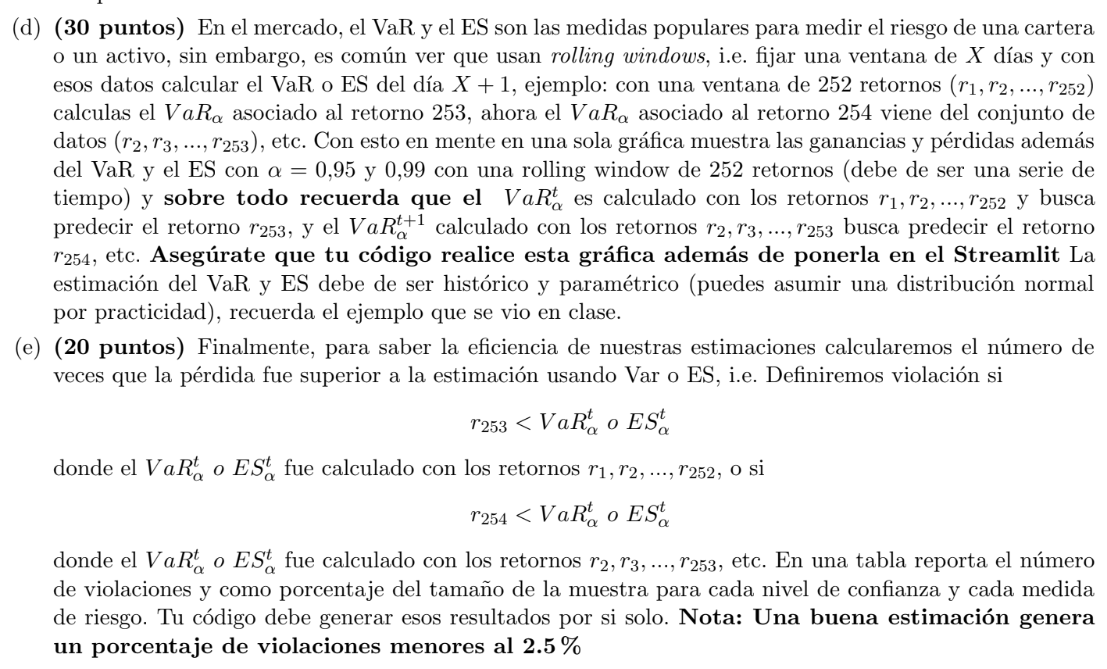

(d) (30 puntos) En el mercado, el VaR y el ES son las medidas populares para medir el riesgo de una cartera
o un activo, sin embargo, es común ver que usan rolling windows, i.e. fijar una ventana de X días y con
esos datos calcular el VaR o ES del día X + 1, ejemplo: con una ventana de 252 retornos (r1,82....,P252)
calculas el VaRa asociado al retorno 253, ahora el VaRa asociado al retorno 254 viene del conjunto de
datos (r2,13,...,1'253), etc. Con esto en mente en una sola gráfica muestra las ganancias y pérdidas además
del VaR y el ES con a = 0,95 y 0,99 con una rolling window de 252 retornos (debe de ser una serie de
tiempo) y sobre todo recuerda que el VaRa es calculado con los retornos r1,12, ...,T252 y busca
predecir el retorno r253, y el VaRit1 calculado con los retornos r2,13,.,1253 busca predecir el retorno
T'254, etc. Asegúrate que tu código realice esta gráfica además de ponerla en el Streamlit La
estimación del VaR y ES debe de ser histórico y paramétrico (puedes asumir una distribución normal
por practicidad), recuerda el ejemplo que se vio en clase.
(e) (20 puntos) Finalmente, para saber la eficiencia de nuestras estimaciones calcularemos el número de
veces que la pérdida fue superior a la estimación usando Var o ES, i.e.

In [ ]:
#Definimos el tamaño de la ventana
tamaño_ventana = 252

#Creamos listas vacías donde almacenarémos los resultados de VaR histórico
VaR_95_hist = []
VaR_99_hist = []

#Creamos listas vacías donde almacenarémos los resultados de VaR paramétrico
VaR_95_Para = []
VaR_99_Para = []

#Creamos listas vacías donde almacenarémos los resultados de ES histórico
ES_95_hist = []
ES_99_hist = []

#Creamos listas vacías donde almacenarémos los resultados de ES paramétrico
ES_95_Para = []
ES_99_Para = []

#Vamos a empezar a hacer los rolling windows, empezando desde el rendimiento 252 hasta llegar al último logrendimiento de google
for i in range (tamaño_ventana, len(df_logrendimientos)):

  #Fraccionamos el data frame de los rendimientos en el tamaño de la ventana
    ventana = df_logrendimientos.iloc[i-tamaño_ventana:i]

  #Calculamos el VaR histórico al 95 y 99 de nuestra ventana
    VaR95_hist = ventana['GOOGL'].quantile(0.05)
    VaR99_hist = ventana['GOOGL'].quantile(0.01)

  #Agregamos los resultados a nuestras listas correspondientes
    VaR_95_hist.append(VaR95_hist)
    VaR_99_hist.append(VaR99_hist)

  #Calculamos media y varianza de nuestra ventana para poder calcular el VaR paramétrico
    mean = np.mean(ventana['GOOGL'])
    stdev = np.std(ventana['GOOGL'])

  #Calculamos el VaR paramétrico al 95 y 99 de nuestra ventana
    VaR95_Par = (norm.ppf(1-0.95,mean,stdev))
    VaR99_Par = (norm.ppf(1-0.99,mean,stdev))

  #Agregamos los resultados a nuestras listas correspondientes
    VaR_95_Para.append(VaR95_Par)
    VaR_99_Para.append(VaR99_Par)

  #Calculamos el ES histórico al 95 y 99 de nuestra ventana
    ES95_hist = ventana['GOOGL'][ventana['GOOGL'] <= VaR95_hist].mean()
    ES99_hist = ventana['GOOGL'][ventana['GOOGL'] <= VaR99_hist].mean()

  #Agregamos los resultados a nuestras listas correspondientes
    ES_95_hist.append(ES95_hist)
    ES_99_hist.append(ES99_hist)

  #Calculamos el ES Paramétrico al 95 y 99 de nuestra ventana
    ES95_Para = ventana['GOOGL'][ventana['GOOGL'] <= VaR95_Par].mean()
    ES99_Para = ventana['GOOGL'][ventana['GOOGL'] <= VaR99_Par].mean()

  #Agregamos los resultados a nuestras listas correspondientes
    ES_95_Para.append(ES95_Para)
    ES_99_Para.append(ES99_Para)


In [ ]:
#En las siguientes lineas de código agregamos los resultados de VaR y ES a un data frame que esté relacionado con la fecha correspondiente a cada resultado

vaR_hist_df_95 = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'VaR Histórico al 95%': np.array(VaR_95_hist).squeeze() })
vaR_hist_df_95.set_index('Date', inplace=True)

VaR_hist_df_99 = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'VaR Histórico al 99%': np.array(VaR_99_hist).squeeze() })
VaR_hist_df_99.set_index('Date', inplace=True)

VaR_Para_df_95 = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'VaR Parametrico al 95%': np.array(VaR_95_Para).squeeze() })
VaR_Para_df_95.set_index('Date', inplace=True)

VaR_Para_df_99 = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'VaR Parametrico al 99%': np.array(VaR_99_Para).squeeze() })
VaR_Para_df_99.set_index('Date', inplace=True)

ES_95_hist_df = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'ES Histórico al 95%': np.array(ES_95_hist).squeeze() })
ES_95_hist_df.set_index('Date', inplace=True)

ES_99_hist_df = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'ES Histórico al 99%': np.array(ES_99_hist).squeeze() })
ES_99_hist_df.set_index('Date', inplace=True)

ES_95_Para_df = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'ES Parametrico al 95%': np.array(ES_95_Para).squeeze() })
ES_95_Para_df.set_index('Date', inplace=True)

ES_99_Para_df = pd.DataFrame({'Date': df_logrendimientos.iloc[252:len(df_logrendimientos)].index, 'ES Parametrico al 99%': np.array(ES_99_Para).squeeze() })
ES_99_Para_df.set_index('Date', inplace=True)


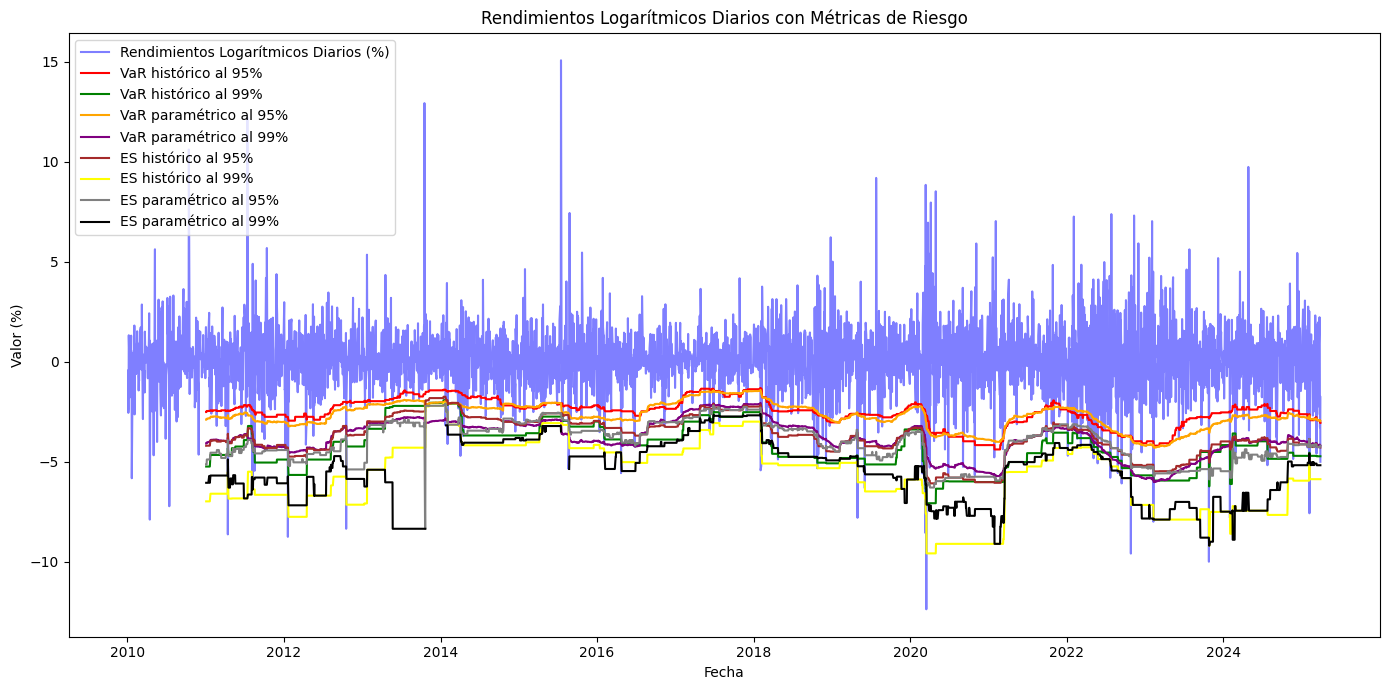

In [ ]:
#Graficamos los logrendimientos con las medidas de riesgo

plt.figure(figsize=(14, 7))

plt.plot(df_logrendimientos.index, df_logrendimientos * 100, label='Rendimientos Logarítmicos Diarios (%)', color='blue', alpha=0.5)

plt.plot(vaR_hist_df_95.index, np.array(VaR_95_hist) * 100, label='VaR histórico al 95%', color='red')

plt.plot(VaR_hist_df_99.index, np.array(VaR_99_hist) * 100, label='VaR histórico al 99%', color='green')

plt.plot(VaR_Para_df_95.index, np.array(VaR_95_Para) * 100, label='VaR paramétrico al 95%', color='orange')

plt.plot(VaR_Para_df_99.index, np.array(VaR_99_Para) * 100, label='VaR paramétrico al 99%', color='purple')

plt.plot(ES_95_hist_df.index, np.array(ES_95_hist) * 100, label='ES histórico al 95%', color='brown')

plt.plot(ES_99_hist_df.index, np.array(ES_99_hist) * 100, label='ES histórico al 99%', color='yellow')

plt.plot(ES_95_Para_df.index, np.array(ES_95_Para) * 100, label='ES paramétrico al 95%', color='gray')

plt.plot(ES_99_Para_df.index, np.array(ES_99_Para) * 100, label='ES paramétrico al 99%', color='black')

plt.title('Rendimientos Logarítmicos Diarios con Métricas de Riesgo')
plt.xlabel('Fecha')
plt.ylabel('Valor (%)')

plt.legend()

plt.tight_layout()
plt.show()

INCISO E)

In [ ]:
df_medidas_riesgo = pd.concat([df_logrendimientos['GOOGL'].iloc[tamaño_ventana:], vaR_hist_df_95, VaR_hist_df_99, VaR_Para_df_95, VaR_Para_df_99, ES_95_hist_df, ES_95_Para_df, ES_99_hist_df, ES_99_Para_df], axis=1)
df_medidas_riesgo

,GOOGL,VaR Histórico al 95%,VaR Histórico al 99%,VaR Parametrico al 95%,VaR Parametrico al 99%,ES Histórico al 95%,ES Parametrico al 95%,ES Histórico al 99%,ES Parametrico al 99%
Date,,,,,,,,,
2011-01-04,-0.003697,-0.025130,-0.052364,-0.028943,-0.040875,-0.041988,-0.051355,-0.069763,-0.060488
2011-01-05,0.011476,-0.025130,-0.052364,-0.028939,-0.040871,-0.041988,-0.051355,-0.069763,-0.060488
2011-01-06,0.007247,-0.024608,-0.052364,-0.028696,-0.040588,-0.041931,-0.051355,-0.069763,-0.060488
2011-01-07,0.004781,-0.024608,-0.052364,-0.028479,-0.040331,-0.041931,-0.048831,-0.069763,-0.060488
2011-01-10,-0.003624,-0.024608,-0.052364,-0.028484,-0.040325,-0.041931,-0.048831,-0.069763,-0.060488
...,...,...,...,...,...,...,...,...,...
2025-03-24,0.022252,-0.029213,-0.047226,-0.029175,-0.041449,-0.042632,-0.042632,-0.058677,-0.051712
2025-03-25,0.017030,-0.029213,-0.047226,-0.029196,-0.041497,-0.042632,-0.042632,-0.058677,-0.051712
2025-03-26,-0.032778,-0.029213,-0.047226,-0.029134,-0.041451,-0.042632,-0.042632,-0.058677,-0.051712


In [ ]:
violaciones_VaR_hist_95 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['VaR Histórico al 95%']).sum()
porcentaje_violaciones_VaR_hist_95 = (violaciones_VaR_hist_95 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el VaR histórico al 95% es de: " , porcentaje_violaciones_VaR_hist_95.round(4), "%" )

violaciones_VaR_hist_99 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['VaR Histórico al 99%']).sum()
porcentaje_violaciones_VaR_hist_99 = (violaciones_VaR_hist_99 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el VaR histórico al 99% es de: " , porcentaje_violaciones_VaR_hist_99.round(4), "%" )

violaciones_VaR_Para_95 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['VaR Parametrico al 95%']).sum()
porcentaje_violaciones_VaR_Para_95 = (violaciones_VaR_Para_95 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el VaR paramétrico al 95% es de: " , porcentaje_violaciones_VaR_Para_95.round(4), "%" )

violaciones_VaR_Para_99 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['VaR Parametrico al 99%']).sum()
porcentaje_violaciones_VaR_Para_99 = (violaciones_VaR_Para_99 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el VaR paramétrico al 99% es de: " , porcentaje_violaciones_VaR_Para_99.round(4), "%" )

violaciones_ES_hist_95 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['ES Histórico al 95%']).sum()
porcentaje_violaciones_ES_hist_95 = (violaciones_ES_hist_95 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el ES histórico al 95% es de: " , porcentaje_violaciones_ES_hist_95.round(4), "%" )

violaciones_ES_hist_99 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['ES Histórico al 99%']).sum()
porcentaje_violaciones_ES_hist_99 = (violaciones_ES_hist_99 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el ES histórico al 99% es de: " , porcentaje_violaciones_ES_hist_99.round(4), "%" )

violaciones_ES_Para_95 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['ES Parametrico al 95%']).sum()
porcentaje_violaciones_ES_Para_95 = (violaciones_ES_Para_95 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el ES paramétrico al 95% es de: " , porcentaje_violaciones_ES_Para_95.round(4), "%" )

violaciones_ES_Para_99 = (df_medidas_riesgo['GOOGL'] < df_medidas_riesgo['ES Parametrico al 99%']).sum()
porcentaje_violaciones_ES_Para_99 = (violaciones_ES_Para_99 / len(df_medidas_riesgo)) * 100
#print("El porcentaje de violaciones para el ES paramétrico al 99% es de: " , porcentaje_violaciones_ES_Para_99.round(4), "%" )

In [ ]:
df_porcentaje_y_numero_de_violaciones = (pd.DataFrame({'VaR Histórico al 95%': [porcentaje_violaciones_VaR_hist_95, violaciones_VaR_hist_95],
                                                      'VaR Histórico al 99%': [porcentaje_violaciones_VaR_hist_99, violaciones_VaR_hist_99],
                                                      'VaR Paramétrico al 95%': [porcentaje_violaciones_VaR_Para_95, violaciones_VaR_Para_95],
                                                      'VaR Paramétrico al 99%': [porcentaje_violaciones_VaR_Para_99, violaciones_VaR_Para_99],
                                                      'ES Histórico al 95%': [porcentaje_violaciones_ES_hist_95, violaciones_ES_hist_95],
                                                      'ES Histórico al 99%': [porcentaje_violaciones_ES_hist_99, violaciones_ES_hist_99],
                                                      'ES Paramétrico al 95%': [porcentaje_violaciones_ES_Para_95, violaciones_ES_Para_99],
                                                      'ES Paramétrico al 99%': [porcentaje_violaciones_ES_Para_99, violaciones_ES_Para_99]}, index = ["Porcentaje de Violaciones", "Número de Violaciones"])).T
df_porcentaje_y_numero_de_violaciones["Porcentaje de Violaciones"] = df_porcentaje_y_numero_de_violaciones["Porcentaje de Violaciones"].round(4).astype(str) + "%"
df_porcentaje_y_numero_de_violaciones['Número de Violaciones'] = df_porcentaje_y_numero_de_violaciones['Número de Violaciones'].astype(int)
df_porcentaje_y_numero_de_violaciones

,Porcentaje de Violaciones,Número de Violaciones
VaR Histórico al 95%,5.6983%,204
VaR Histórico al 99%,1.5642%,56
VaR Paramétrico al 95%,5.0%,179
VaR Paramétrico al 99%,2.2067%,79
ES Histórico al 95%,2.2626%,81
ES Histórico al 99%,0.8101%,29
ES Paramétrico al 95%,2.067%,35
ES Paramétrico al 99%,0.9777%,35


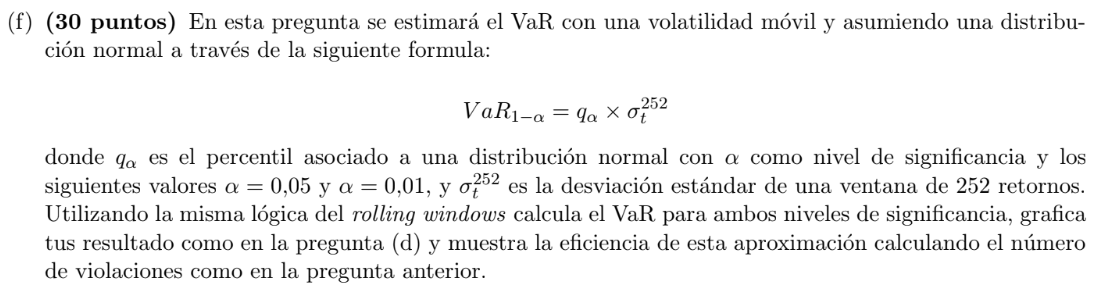